Student Name: Chenwei Zhu

Student Number: 1006003619

# **Data Prepare**

In [1]:
# Link to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import pkg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=06d0fa2e80bd0c92180c6d9ed3e34e5f5af57d0db896514b7a6272f2d9e8c44e
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [3]:
# define file path
file_path = '/content/drive/My Drive/INF2178/A2/INF2178_A2_data.xlsx'
# read the data file into a DataFrame
df = pd.read_excel(file_path)

In [4]:
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


# **Data Summary**


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


In [6]:
# Check Missing Values
missing_values_summary = df.isnull().sum()
print(missing_values_summary)

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64


Exploratory Data Analysis (EDA)

In [7]:
df['TOTSPACE'].describe()

count    1063.000000
mean       75.674506
std        47.816518
min         6.000000
25%        43.000000
50%        62.000000
75%        97.000000
max       402.000000
Name: TOTSPACE, dtype: float64

Text(0, 0.5, 'Frequency')

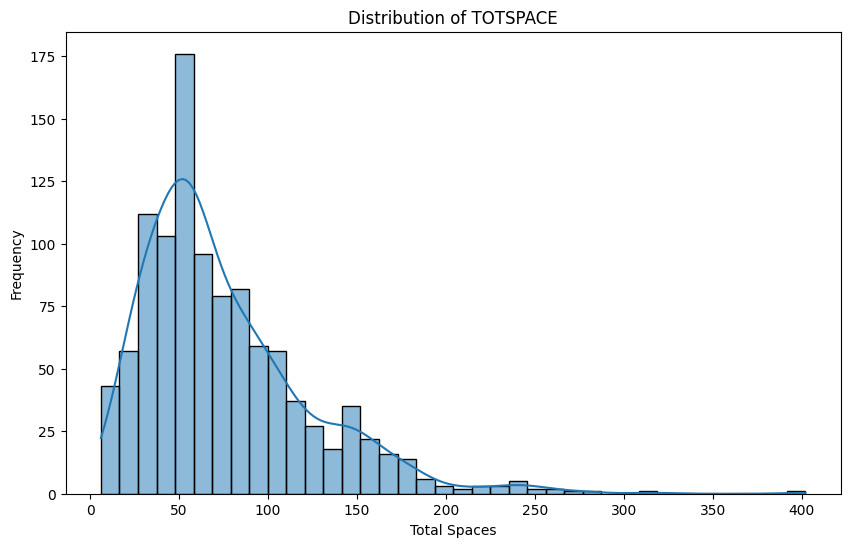

In [8]:
# histgram of TOTSPACE
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTSPACE'], kde=True)
plt.title('Distribution of TOTSPACE')
plt.xlabel('Total Spaces')
plt.ylabel('Frequency')

One Way ANOVA

<ipython-input-9-c5f588b493d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, palette="Set3")


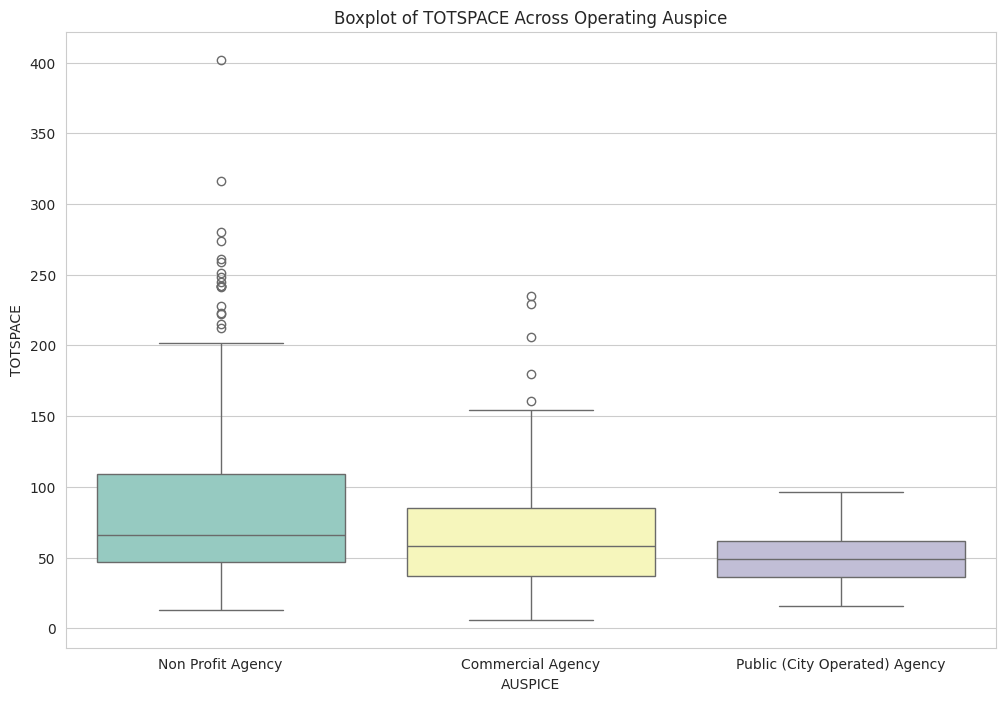

In [9]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the boxplot for TOTSPACE across different AUSPICE
plt.figure(figsize=(12, 8))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, palette="Set3")
plt.title('Boxplot of TOTSPACE Across Operating Auspice')
plt.xlabel('AUSPICE')
plt.ylabel('TOTSPACE')

plt.show()


In [10]:
model_oneway = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit() # Fit One-Way ANOVA via OLS
anova_table = sm.stats.anova_lm(model_oneway, typ=2) # Generate ANOVA table

anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [26]:
# Perform the test to compare means of 'TOTSPACE' variable across different levels of 'AUSPICE' after fitting the ANOVA model
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')

# Display the summary of Tukey's HSD test results
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


In [12]:
significant_results = res.tukey_summary[res.tukey_summary["p-value"] < 0.05] # Select Significant results

significant_results

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901


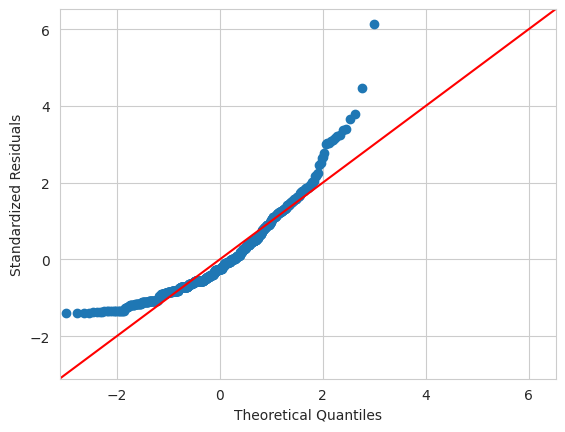

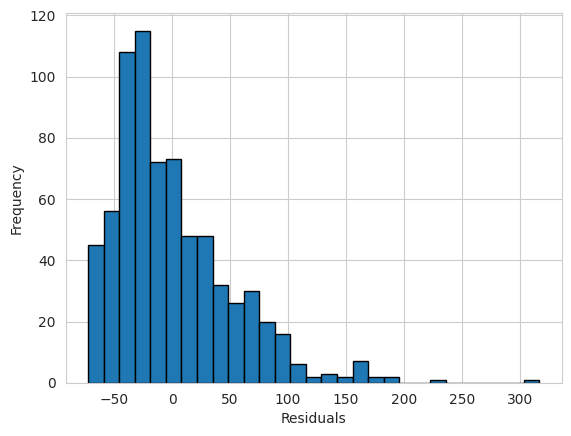

In [13]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [14]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_oneway.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [15]:

#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary


,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


Two-way ANOVA

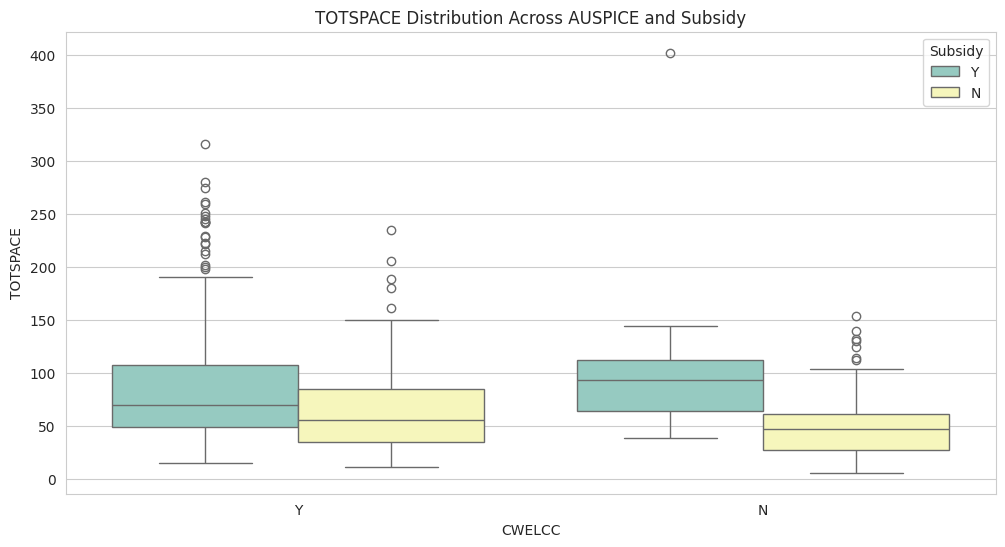

In [16]:
# Boxplot of TGSPACE across subsidy and cwelcc_flag
plt.figure(figsize=(12, 6))

sns.boxplot(x='cwelcc_flag', y='TOTSPACE', hue='subsidy', data=df, palette="Set3")
plt.title('TOTSPACE Distribution Across AUSPICE and Subsidy')
plt.xlabel('CWELCC')
plt.ylabel('TOTSPACE')
plt.legend(title='Subsidy')
plt.show()

In [17]:
# Two-way ANOVA
model_twoway=ols('TOTSPACE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)', data=df).fit()
# Create ANOVA Table
anova_table = sm.stats.anova_lm(model_twoway, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(cwelcc_flag),6.723429e+03,1.0,3.176381,7.499648e-02
C(subsidy),9.816181e+04,1.0,46.375040,1.633653e-11
C(cwelcc_flag):C(subsidy),1.910868e+04,1.0,9.027604,2.721895e-03
Residual,2.241580e+06,1059.0,NaN,NaN


In [18]:
# ANOVA table
res2 = stat()
res2.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')
res2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(cwelcc_flag),1.0,6.723429e+03,6723.428955,3.176381,7.499648e-02
C(subsidy),1.0,9.816181e+04,98161.809243,46.375040,1.633653e-11
C(cwelcc_flag):C(subsidy),1.0,1.910868e+04,19108.682949,9.027604,2.721895e-03
Residual,1059.0,2.241580e+06,2116.694877,NaN,NaN


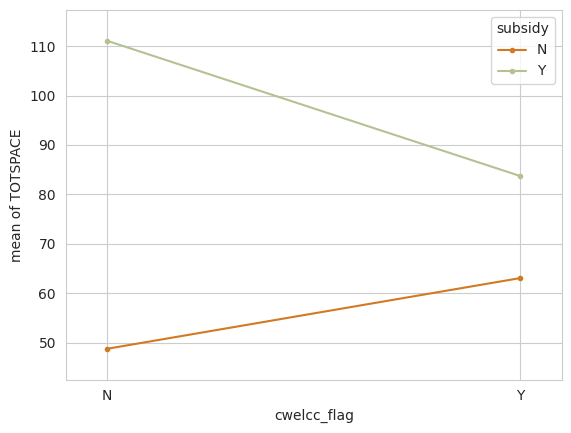

In [19]:
# Import libraries
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Create an interaction plot to visualize the interaction effect between 'cwelcc_flag' and 'subsidy' on 'TOTSPACE'
fig = interaction_plot(x=df['cwelcc_flag'], trace=df['subsidy'], response=df['TOTSPACE'], colors=['#d17a22', '#b4c292'])

# Display the interaction plot
plt.show()

In [20]:
# Perform Tukey's Honestly Significant Difference (HSD) test to compare means of 'TOTSPACE' variable across different levels of 'subsidy'
# and 'cwelcc_flag' variables after fitting the ANOVA model
res2.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')

# Display the summary of Tukey's HSD test results
res2.tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121178,24.808338,43.434018,10.172903,0.001


In [21]:
# Perform Tukey's Honestly Significant Difference (HSD) test to compare means of 'TOTSPACE' variable across different levels of 'cwelcc_flag'
# and 'subsidy' variables after fitting the ANOVA model
res2.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='cwelcc_flag', anova_model='TOTSPACE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')

# Display the summary of Tukey's HSD test results
res2.tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,24.696923,11.876941,37.516905,5.348826,0.001


In [22]:
# Perform Tukey's Honestly Significant Difference (HSD) test to compare means of 'TOTSPACE' variable across different levels of 'cwelcc_flag' and 'subsidy'
# after fitting the ANOVA model with interaction
res2.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var=['cwelcc_flag', 'subsidy'], anova_model='TOTSPACE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')

# Display the summary of Tukey's HSD test results
res2.tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, Y)","(Y, N)",29.128683,14.090822,44.166544,7.054287,0.001000
1,"(Y, Y)","(N, Y)",30.320515,-9.030303,69.671332,2.806087,0.194903
2,"(Y, Y)","(N, N)",40.489249,22.077829,58.900670,8.008861,0.001000
3,"(Y, N)","(N, Y)",59.449198,18.030838,100.867558,5.227228,0.001344
4,"(Y, N)","(N, N)",11.360566,-11.133302,33.854434,1.839307,0.555438
5,"(N, Y)","(N, N)",70.809764,28.050863,113.568666,6.030939,0.001000


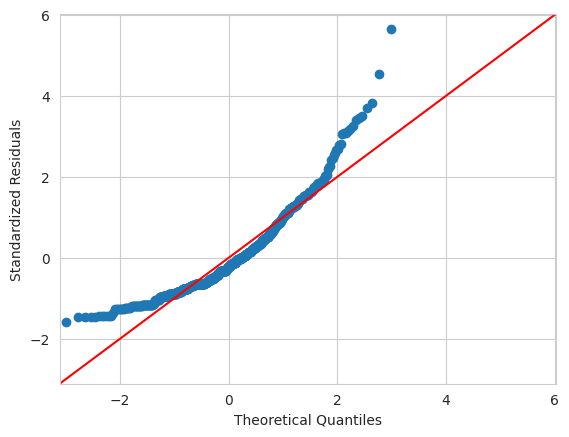

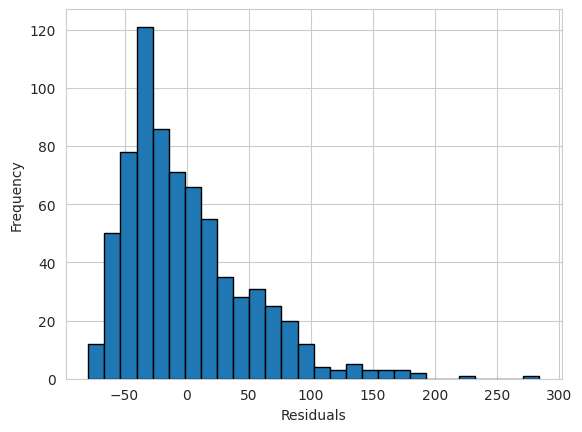

In [23]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res2.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res2.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [24]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_twoway.resid)
print(w,pvalue)

0.8959829211235046 3.337903758624965e-26


In [25]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res2.levene(df=df, res_var='TOTSPACE', xfac_var=['cwelcc_flag','subsidy'])
res2.levene_summary


,Parameter,Value
0,Test statistics (W),7.3853
1,Degrees of freedom (Df),3.0000
2,p value,0.0001
